In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
data = pd.read_csv('customer-churn.csv', encoding='unicode_escape')

In [267]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [269]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [270]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [271]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [272]:
categorical_columns = data.nunique()
print(categorical_columns.to_numpy())
data.columns[1]

[7043    2    2    2    2   73    2    3    3    3    3    3    3    3
    3    3    2    4 1585 6531    2]


'gender'

In [273]:
for c in data.columns:
    print(c)
    print(data[data[c] == ' '].index)


customerID
Int64Index([], dtype='int64')
gender
Int64Index([], dtype='int64')
SeniorCitizen
Int64Index([], dtype='int64')
Partner
Int64Index([], dtype='int64')
Dependents
Int64Index([], dtype='int64')
tenure
Int64Index([], dtype='int64')
PhoneService
Int64Index([], dtype='int64')
MultipleLines
Int64Index([], dtype='int64')
InternetService
Int64Index([], dtype='int64')
OnlineSecurity
Int64Index([], dtype='int64')
OnlineBackup
Int64Index([], dtype='int64')
DeviceProtection
Int64Index([], dtype='int64')
TechSupport
Int64Index([], dtype='int64')
StreamingTV
Int64Index([], dtype='int64')
StreamingMovies
Int64Index([], dtype='int64')
Contract
Int64Index([], dtype='int64')
PaperlessBilling
Int64Index([], dtype='int64')
PaymentMethod
Int64Index([], dtype='int64')
MonthlyCharges
Int64Index([], dtype='int64')
TotalCharges
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')
Churn
Int64Index([], dtype='int64')


In [274]:
rows_index_with_empty = [488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]
rows_with_empty = data.iloc[rows_index_with_empty]
rows_with_empty

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [275]:
for row_index in rows_index_with_empty:
    value_to_put = data.at[row_index, 'MonthlyCharges']
    data.at[row_index, 'TotalCharges'] = value_to_put

In [276]:
from pandas import DataFrame
from sklearn.preprocessing import OneHotEncoder

def convert_categorical_to_num(dataframe: DataFrame, column_name: str):
    onehotencoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
    encoded_column = onehotencoder.fit_transform(dataframe[column_name].to_numpy().reshape(-1,1))
    return onehotencoder, encoded_column

def build_ids_from_column(data: DataFrame, column_name: str, replace=True):
    count = 0
    ids = {}
    for v in data[column_name]:
        if v not in ids:
            ids[v] = count
            count+=1
    if replace:
        data[column_name].replace(ids, inplace=True)
    return ids



<Axes: >

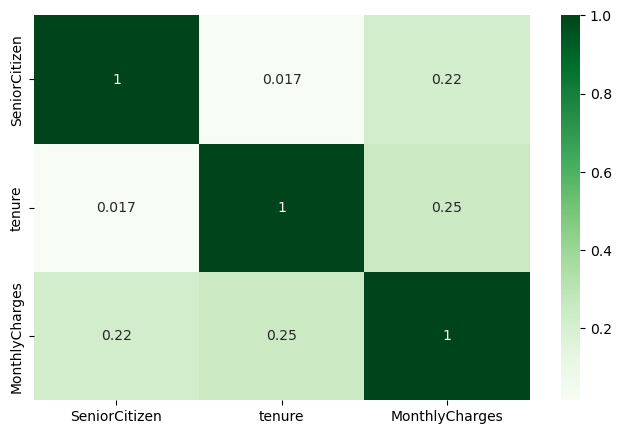

In [277]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(8,5))
sns.heatmap(corr, cmap="Greens",annot=True)

In [278]:
gender_id = build_ids_from_column(data, 'gender')
senior_citizen_id = build_ids_from_column(data, 'SeniorCitizen')
partner_id = build_ids_from_column(data, 'Partner')
dependents_id = build_ids_from_column(data, 'Dependents')
phone_service_id = build_ids_from_column(data, 'PhoneService')
multiple_lines_id = build_ids_from_column(data, 'MultipleLines')
internet_service_id = build_ids_from_column(data, 'InternetService')
online_security_id = build_ids_from_column(data, 'OnlineSecurity')
device_protection_id = build_ids_from_column(data, 'DeviceProtection')
tech_support_id = build_ids_from_column(data, 'TechSupport')
streaming_tv_id = build_ids_from_column(data, 'StreamingTV')
streaming_movies_id = build_ids_from_column(data, 'StreamingMovies')
contract_id = build_ids_from_column(data, 'Contract')
paperless_billing_id = build_ids_from_column(data, 'PaperlessBilling')
payment_method = build_ids_from_column(data, 'PaymentMethod')
churn_id = build_ids_from_column(data, 'Churn')
online_backup_id = build_ids_from_column(data, 'OnlineBackup')

In [279]:
y = data['Churn']
data.drop(['Churn','customerID'], inplace=True, axis=1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85
1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,56.95,1889.5
2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,53.85,108.15
3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,42.30,1840.75
4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,70.70,151.65


In [280]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, make_scorer
# print(X)
# print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.1, shuffle=False)


In [281]:
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 4664, 1: 1674})
Counter({0: 510, 1: 195})


In [282]:
from sklearn.linear_model import LogisticRegression
logistic_clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = logistic_clf.predict(X_test)

/home/daniel/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [283]:
def apply_metrics(true_values, predicted_values):
    metrics = {}
    metrics['accuracy_score'] = accuracy_score(true_values, predicted_values)
    metrics['recall_score'] = recall_score(true_values, predicted_values)
    metrics['precision_score'] = precision_score(true_values, predicted_values)
    metrics['f1_score'] = f1_score(true_values, predicted_values)
    metrics['roc_auc_score'] = roc_auc_score(true_values, predicted_values)
    metrics['confusion_matrix'] = confusion_matrix(true_values, predicted_values)
    return metrics

In [284]:
lr_metrics = apply_metrics(y_test, y_pred)
lr_metrics

{'accuracy_score': 0.8,
 'recall_score': 0.48205128205128206,
 'precision_score': 0.7014925373134329,
 'f1_score': 0.5714285714285714,
 'roc_auc_score': 0.7018099547511313,
 'confusion_matrix': array([[470,  40],
        [101,  94]])}

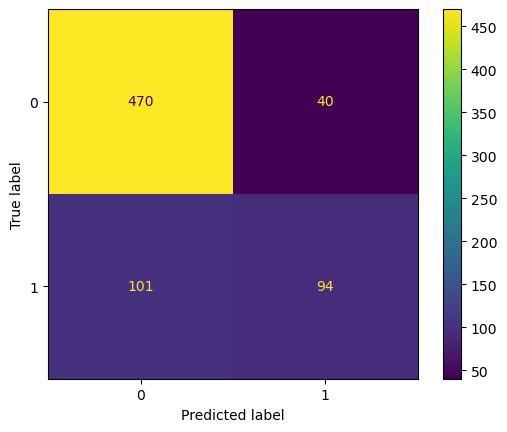

In [285]:
def plot_confusion_matrix(clf, true_values, predicted_values):
    cm = confusion_matrix(true_values, predicted_values, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
    disp.plot()

plot_confusion_matrix(logistic_clf, y_test, y_pred)

In [286]:
from sklearn.ensemble import RandomForestClassifier

random_forest_clf = RandomForestClassifier(max_depth=2, random_state=0)
random_forest_clf.fit(X_train, y_train)
y_pred = random_forest_clf.predict(X_test)

In [287]:
random_forest_metrics = apply_metrics(y_test, y_pred)
random_forest_metrics


{'accuracy_score': 0.7560283687943262,
 'recall_score': 0.14871794871794872,
 'precision_score': 0.8285714285714286,
 'f1_score': 0.25217391304347825,
 'roc_auc_score': 0.5684766214177979,
 'confusion_matrix': array([[504,   6],
        [166,  29]])}

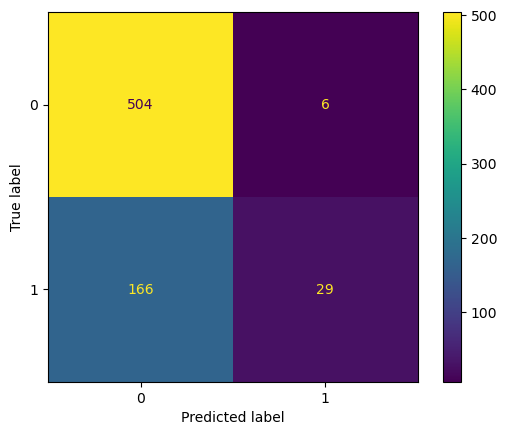

In [288]:
plot_confusion_matrix(random_forest_clf, y_test, y_pred)

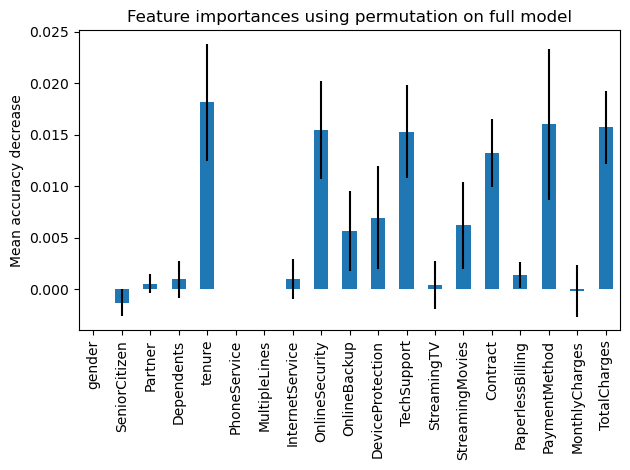

In [289]:
from sklearn.inspection import permutation_importance


result = permutation_importance(
    random_forest_clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
forest_importances = pd.Series(result.importances_mean, index=data.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()


In [290]:

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=0, kernel='poly'))
svc_clf.fit(X_train, y_train)
y_pred = svc_clf.predict(X_test)


In [291]:
svc_metrics = apply_metrics(y_test, y_pred)
svc_metrics


{'accuracy_score': 0.8099290780141843,
 'recall_score': 0.4564102564102564,
 'precision_score': 0.7606837606837606,
 'f1_score': 0.5705128205128206,
 'roc_auc_score': 0.7007541478129713,
 'confusion_matrix': array([[482,  28],
        [106,  89]])}

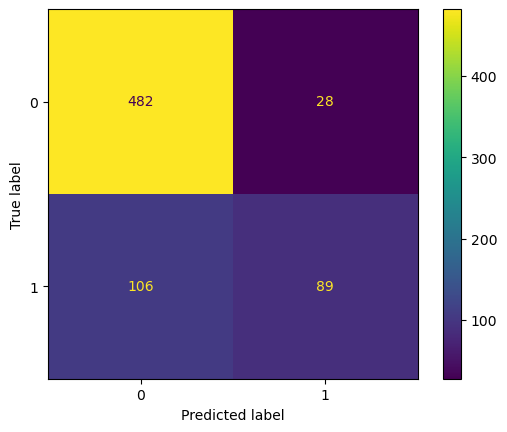

In [292]:
plot_confusion_matrix(svc_clf, y_test, y_pred)

In [293]:
lr_metrics

{'accuracy_score': 0.8,
 'recall_score': 0.48205128205128206,
 'precision_score': 0.7014925373134329,
 'f1_score': 0.5714285714285714,
 'roc_auc_score': 0.7018099547511313,
 'confusion_matrix': array([[470,  40],
        [101,  94]])}

In [295]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = {'accuracy': make_scorer(accuracy_score), 'precision': make_scorer(precision_score), 'recall': make_scorer(recall_score), 'auc': make_scorer(roc_auc_score), 'f1': make_scorer(f1_score)}
cv_svc = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=0, kernel='poly'))
cv_svc_scores = cross_validate(cv_svc, data, y, scoring=scoring)
cv_random_forest = RandomForestClassifier(max_depth=2, random_state=0)
cv_random_forest_scores = cross_validate(cv_random_forest, data, y, scoring=scoring)
cv_lr = LogisticRegression(random_state=0).fit(X_train, y_train)
cv_lr_scores = cross_validate(cv_lr, data, y, scoring=scoring)


/home/daniel/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/daniel/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

In [296]:
cv_lr_scores

{'fit_time': array([0.10464144, 0.10369635, 0.10440731, 0.11339498, 0.10741568]),
 'score_time': array([0.0213685 , 0.02124643, 0.03460264, 0.0236578 , 0.02335596]),
 'test_accuracy': array([0.80624556, 0.81121363, 0.79559972, 0.81178977, 0.80184659]),
 'test_precision': array([0.66666667, 0.66564417, 0.63522013, 0.66981132, 0.66211604]),
 'test_recall': array([0.54010695, 0.5802139 , 0.54010695, 0.57104558, 0.51871658]),
 'test_auc': array([0.72126121, 0.73744995, 0.71401483, 0.73479815, 0.71148595]),
 'test_f1': array([0.59675037, 0.62      , 0.58381503, 0.61649783, 0.58170915])}

In [297]:
cv_random_forest_scores

{'fit_time': array([0.56707501, 0.55817914, 0.55127287, 0.56657696, 0.55955672]),
 'score_time': array([0.05669498, 0.05698419, 0.05562353, 0.05971456, 0.05679822]),
 'test_accuracy': array([0.77146913, 0.76933996, 0.76082328, 0.765625  , 0.76349432]),
 'test_precision': array([0.81707317, 0.72477064, 0.7032967 , 0.7721519 , 0.73033708]),
 'test_recall': array([0.17914439, 0.21122995, 0.17112299, 0.16353887, 0.17379679]),
 'test_auc': array([0.58232582, 0.59112222, 0.57251802, 0.57307378, 0.57529298]),
 'test_f1': array([0.29385965, 0.32712215, 0.27526882, 0.2699115 , 0.28077754])}

In [298]:
cv_svc_scores

{'fit_time': array([1.82517457, 1.73662639, 1.90587854, 1.83238935, 1.86628199]),
 'score_time': array([0.27743649, 0.29714298, 0.26520133, 0.26132727, 0.25483942]),
 'test_accuracy': array([0.80056778, 0.80056778, 0.78566359, 0.80539773, 0.80823864]),
 'test_precision': array([0.68825911, 0.69135802, 0.65254237, 0.71428571, 0.71138211]),
 'test_recall': array([0.45454545, 0.44919786, 0.41176471, 0.44235925, 0.46791444]),
 'test_auc': array([0.69007466, 0.68836705, 0.66626883, 0.68929557, 0.69962453]),
 'test_f1': array([0.54750403, 0.5445705 , 0.50491803, 0.54635762, 0.56451613])}